In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./data/cs-training.csv')

In [62]:
def print_mmm(col):
    print "Mode: " + str(col.mode()[0])
    print "Mean: " + str(col.mean())
    print "Median: " + str(col.median())


##Analysing the data consistency
First we check how much of the data is missing:

In [113]:
for c in df.columns[1:]:
    print c + ': %s' % (df[c].shape[0] - df[c].count().sum())

SeriousDlqin2yrs: 0
RevolvingUtilizationOfUnsecuredLines: 0
age: 0
NumberOfTime30-59DaysPastDueNotWorse: 0
DebtRatio: 0
MonthlyIncome: 29731
NumberOfOpenCreditLinesAndLoans: 0
NumberOfTimes90DaysLate: 0
NumberRealEstateLoansOrLines: 0
NumberOfTime60-89DaysPastDueNotWorse: 0
NumberOfDependents: 3924


Lets also see the number of rows with at least one missing date.

In [114]:
print 'number of rows with at least one missing date: ' + str(df.shape[0] - df.dropna().shape[0])

number of rows with at least one missing date: 29731


Number of people with financial distress.

In [115]:
print 'Number of people with financial distress: ' + str(df.loc[df.SeriousDlqin2yrs == 1].shape[0])

Number of people with financial distress: 10026


##Overall distribution of financially distressed clients

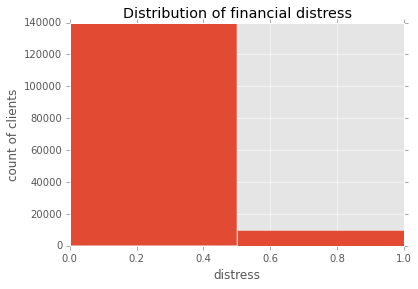

In [116]:
df.SeriousDlqin2yrs.plot(kind='hist', bins=2)
plt.title('Distribution of financial distress')
plt.xlabel('distress')
plt.ylabel('count of clients')

financially distressed clients:

In [117]:
proc = df.dropna()
100 * float(df.dropna().loc[df.dropna().SeriousDlqin2yrs == 1].shape[0]) / df.dropna().shape[0] 

6.948590243537404

__About 7% of all clients have encountered financial distress.__

##Analysing feature space

The following features are already ordered by importance.

###RevolvingUtilizationOfUnsecuredLines

__Description__: _Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits._ 

The input is ranged [0,2]. Most of the data stays within the boundaries [0,1], a value above 1 indicates, that the credits have been overdrawn.

We had to limit the x-axis, since there were outliers distorting the plot.

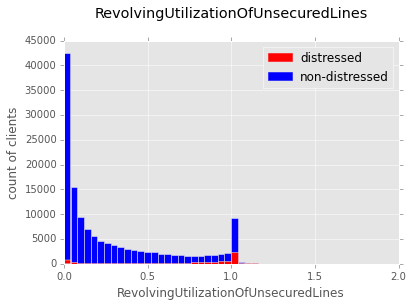

In [118]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.plot(kind='hist', bins=50, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.plot(kind='hist', bins=50, color='red')
plt.title('RevolvingUtilizationOfUnsecuredLines', y=1.08)
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 5000)

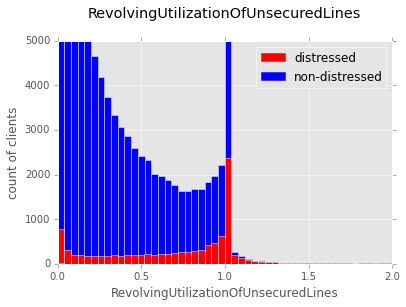

In [119]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.plot(kind='hist', bins=50, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.plot(kind='hist', bins=50, color='red')
plt.title('RevolvingUtilizationOfUnsecuredLines', y=1.08)
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,5000)  

It looks like borrowers are more likely to encounter distress with a higher 

In [66]:
print 'non-distressed'
print_mmm(df.loc[df.SeriousDlqin2yrs == 0].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines)

non-distressed
Mode: 0.0
Mean: 0.293224153813
Median: 0.132457336


In [65]:
print 'distressed'
print_mmm(df.loc[df.SeriousDlqin2yrs == 1].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines)

distressed
Mode: 0.9999999
Mean: 0.700023488863
Median: 0.83494624


##DebtRatio

__Description:__ _Monthly debt payments, alimony,living costs divided by monthy gross income._

This value should also have a range of [0,1]. All samples values higher than the upper boundary of 1, represent clients whose monthly debt payments exceed their monthly income.

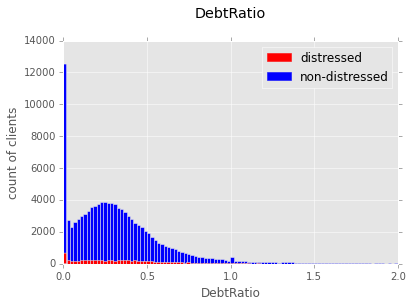

In [123]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.DebtRatio < 2].DebtRatio.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.DebtRatio < 2].DebtRatio.plot(kind='hist', bins=100, color='red')
plt.title('DebtRatio', y=1.08)
plt.xlabel('DebtRatio')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 500)

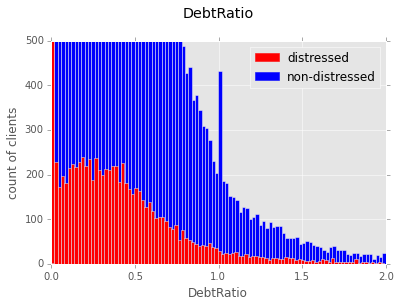

In [124]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.DebtRatio < 2].DebtRatio.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.DebtRatio < 2].DebtRatio.plot(kind='hist', bins=100, color='red')
plt.title('DebtRatio', y=1.08)
plt.xlabel('DebtRatio')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,500)

However, we had to limit the plotted ratio to 2.0, since the larges value of this feature lies at:

In [125]:
print df.DebtRatio.max()

329664.0


which would distort the plot to much and seems rather unreal, so it might be an error. Of course as a next step in data wrangling we have to crop outliers, but since a baffling amount of

In [126]:
df.loc[df.DebtRatio > 2].DebtRatio.count()

31045

samples lies above 2.0, it is not that trivial to determine a rule of thumb for outlier elimination. It seems unlikely that more than a fifth of the samples is faulty. The data seems rather unbalanced in ths particular feature.

It's not that visible in the plots, but considering the mean and median, i.e. distressed:

In [69]:
print 'non-distressed' 
print_mmm(df.loc[df.SeriousDlqin2yrs == 0].loc[df.DebtRatio < 2].DebtRatio)

non-distressed
Mode: 0.0
Mean: 0.330567992607
Median: 0.281137754


and non-distressed:

In [72]:
print 'distressed' 
print_mmm(df.loc[df.SeriousDlqin2yrs == 1].loc[df.DebtRatio < 2].DebtRatio)

distressed
Mode: 0.0
Mean: 0.411282121894
Median: 0.344811491


a higher debt ratio indicates a higher chance of distress.

##MonthlyIncome

__Description:__ _Monthly income._



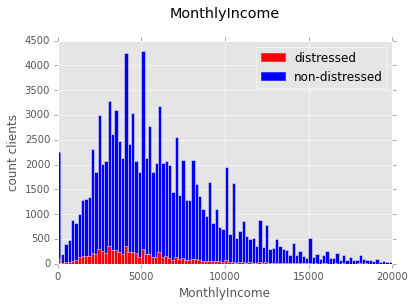

In [129]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.MonthlyIncome < 20000].MonthlyIncome.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.MonthlyIncome < 20000].MonthlyIncome.plot(kind='hist', bins=100, color='red')
plt.title('MonthlyIncome', y=1.08)
plt.xlabel('MonthlyIncome')
plt.ylabel('count clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

In [71]:
print 'non-distressed' 
print_mmm(df.loc[df.SeriousDlqin2yrs == 0].loc[df.MonthlyIncome < 20000].MonthlyIncome)

non-distressed
Mode: 5000.0
Mean: 6072.24517793
Median: 5399.0


In [70]:
print 'distressed' 
print_mmm(df.loc[df.SeriousDlqin2yrs == 1].loc[df.MonthlyIncome < 20000].MonthlyIncome)

distressed
Mode: 3000.0
Mean: 5186.20507528
Median: 4470.5


##Age
__Description__: _Age._

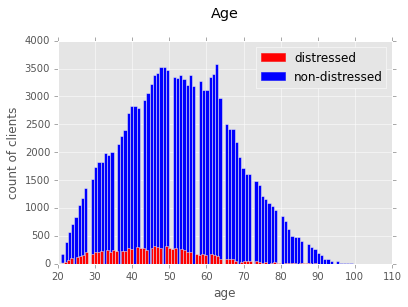

In [132]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.age >= 20].age.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.age >= 20].age.plot(kind='hist', bins=100, color='red')
plt.title('Age', y=1.08)
plt.xlabel('age')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

Well here we don't need to consider the mean, mode or median, the shift in this distribution is quite noticeable: younger borrowers are more likely to have payment problems.

##NumberOfOpenCreditLinesAndLoans
__Description:__ _Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)_

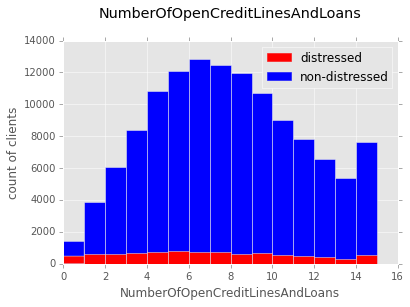

In [47]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.NumberOfOpenCreditLinesAndLoans <= 15].NumberOfOpenCreditLinesAndLoans.plot(kind='hist', bins=15, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.NumberOfOpenCreditLinesAndLoans <= 15].NumberOfOpenCreditLinesAndLoans.plot(kind='hist', bins=15, color='red')
plt.title('NumberOfOpenCreditLinesAndLoans', y=1.08)
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 1000)

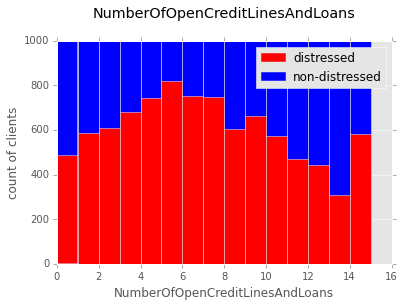

In [48]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.NumberOfOpenCreditLinesAndLoans <= 15].NumberOfOpenCreditLinesAndLoans.plot(kind='hist', bins=15, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.NumberOfOpenCreditLinesAndLoans <= 15].NumberOfOpenCreditLinesAndLoans.plot(kind='hist', bins=15, color='red')
plt.title('NumberOfOpenCreditLinesAndLoans', y=1.08)
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,1000)

In [73]:
print 'non-distressed' 
print_mmm(df.loc[df.SeriousDlqin2yrs == 0].NumberOfOpenCreditLinesAndLoans)

non-distressed
Mode: 6
Mean: 8.49362024376
Median: 8.0


In [74]:
print 'distressed' 
print_mmm(df.loc[df.SeriousDlqin2yrs == 1].NumberOfOpenCreditLinesAndLoans)

distressed
Mode: 5
Mean: 7.88230600439
Median: 7.0


##Payment Delays

Now we will analyse three classes which represent the amount of days a borrower was late with payments. These three classes are split in the ranges [30,59], [60-89] and [90, infinity). 

The date bares no suprises, obviously a borrower with significant payment delays is more likely do not pay at all. A accumulation of late days signifies poor money management.

###NumberOfTime30-59DaysPastDueNotWorse
__Description:__ _Number of times borrower has been 30-59 days past due but no worse in the last 2 years._

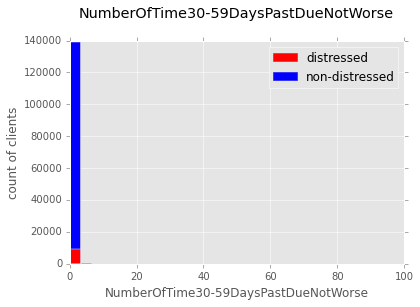

In [26]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTime30-59DaysPastDueNotWorse', y=1.08)
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 10000)

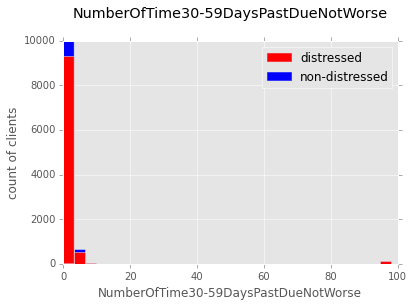

In [27]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTime30-59DaysPastDueNotWorse', y=1.08)
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,10000)

###NumberOfTime60-89DaysPastDueNotWorse
__Description:__ _Number of times borrower has been 60-89 days past due but no worse in the last 2 years._

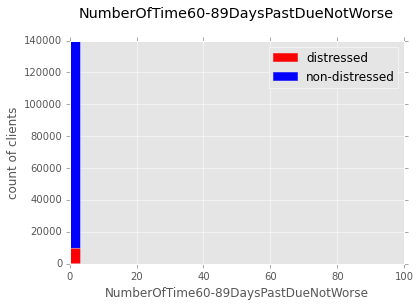

In [28]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTime60-89DaysPastDueNotWorse', y=1.08)
plt.xlabel('NumberOfTime60-89DaysPastDueNotWorse')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 10000)

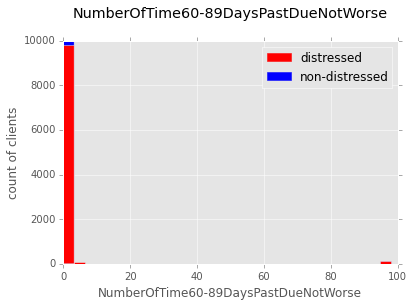

In [29]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTime60-89DaysPastDueNotWorse', y=1.08)
plt.xlabel('NumberOfTime60-89DaysPastDueNotWorse')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,10000)

###NumberOfTimes90DaysLate
__Description:__ _Number of times borrower has been 90 days or more past due._

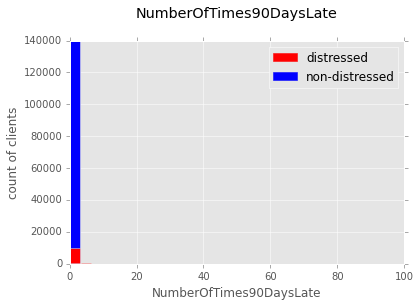

In [24]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberOfTimes90DaysLate'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberOfTimes90DaysLate'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTimes90DaysLate', y=1.08)
plt.xlabel('NumberOfTimes90DaysLate')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 10000)

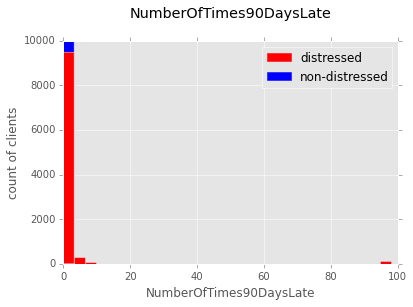

In [25]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberOfTimes90DaysLate'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberOfTimes90DaysLate'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTimes90DaysLate', y=1.08)
plt.xlabel('NumberOfTimes90DaysLate')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,10000)

##NumberRealEstateLoansOrLines
__Description:__ _Number of mortgage and real estate loans including home equity lines of credit._

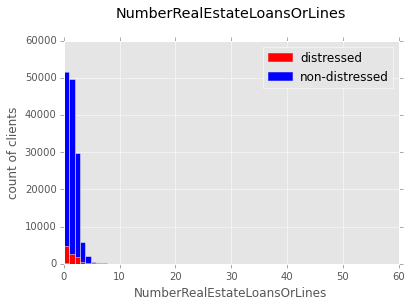

In [38]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberRealEstateLoansOrLines'].plot(kind='hist', bins=56, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberRealEstateLoansOrLines'].plot(kind='hist', bins=30, color='red')
plt.title('NumberRealEstateLoansOrLines', y=1.08)
plt.xlabel('NumberRealEstateLoansOrLines')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 20)

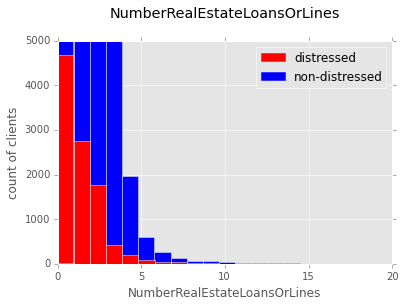

In [37]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberRealEstateLoansOrLines'].plot(kind='hist', bins=56, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberRealEstateLoansOrLines'].plot(kind='hist', bins=30, color='red')
plt.title('NumberRealEstateLoansOrLines', y=1.08)
plt.xlabel('NumberRealEstateLoansOrLines')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,5000)
plt.xlim(0,20)

In [75]:
print 'non-distressed'
print_mmm(df.loc[df.SeriousDlqin2yrs == 0].NumberRealEstateLoansOrLines)

non-distressed
Mode: 0
Mean: 1.02036806836
Median: 1.0


In [76]:
print 'distressed'
print_mmm(df.loc[df.SeriousDlqin2yrs == 1].NumberRealEstateLoansOrLines)

distressed
Mode: 0
Mean: 0.988529822462
Median: 1.0


That slight shift is quite peculiar. We actually don't know what to make of it.

##NumberOfDependents
__Description:__ _Number of dependents in family excluding themselves (spouse, children etc.)_

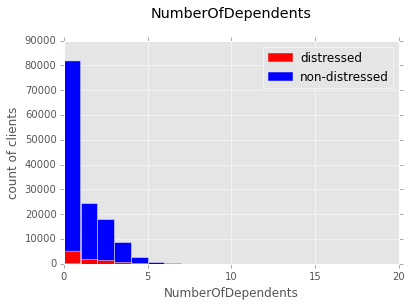

In [60]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberOfDependents'].plot(kind='hist', bins=20, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberOfDependents'].plot(kind='hist', bins=8, color='red')
plt.title('NumberOfDependents', y=1.08)
plt.xlabel('NumberOfDependents')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 10)

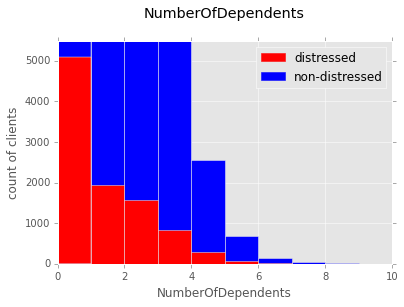

In [59]:
df.loc[df.SeriousDlqin2yrs == 0]['NumberOfDependents'].plot(kind='hist', bins=20, color='blue')
df.loc[df.SeriousDlqin2yrs == 1]['NumberOfDependents'].plot(kind='hist', bins=8, color='red')
plt.title('NumberOfDependents', y=1.08)
plt.xlabel('NumberOfDependents')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,5500)
plt.xlim(0,10)

In [77]:
print 'non-distressed'
print_mmm(df.loc[df.SeriousDlqin2yrs == 0].NumberOfDependents)

non-distressed
Mode: 0.0
Mean: 0.743417334048
Median: 0.0


In [78]:
print 'distressed'
print_mmm(df.loc[df.SeriousDlqin2yrs == 1].NumberOfDependents)

distressed
Mode: 0.0
Mean: 0.948207575911
Median: 0.0
